# **Data Preprocessing**

In [93]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model as KerasModel

# representation of model layers
from keras.utils.vis_utils import plot_model

import markov
from markov import EvaluationRecorder
from markov import Project, Model, ModelClass
from markov.api.schemas.model_recording import SingleTagInferenceRecord

In [2]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [4]:
# importing dataset
train_data = pd.read_csv('./datasets/KDDTrain+.txt',header=None, names=col_names)
test_data = pd.read_csv('./datasets/KDDTest+.txt',header=None, names=col_names)

In [5]:
# print dataset
print("Train Data")
train_data

Train Data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [6]:
# print dataset
print("Test Data")
test_data

Test Data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [7]:
 # changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [8]:
def data_preprocess(df):
    df.drop(['difficulty_level'],axis=1,inplace=True)
    print(df.shape)
    print(df.describe())
    print(df['label'].value_counts())
    change_label(df)
    print(df['label'].value_counts())

In [9]:
data_preprocess(train_data)

(125973, 42)
           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000 

In [10]:
data_preprocess(test_data)

(22544, 42)
           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.15

# **Data Normalization**

In [11]:
def data_normalization(df):
    # selecting numeric attributes columns from data
    numeric_col = df.select_dtypes(include='number').columns
    std_scaler = StandardScaler()
    for i in numeric_col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df, numeric_col

In [12]:
train_data, train_numeric_col = data_normalization(train_data.copy())
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [13]:
test_data, test_numeric_col = data_normalization(test_data.copy())
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,Dos
1,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,Dos
2,-0.154113,tcp,ftp_data,SF,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,normal
3,-0.155534,icmp,eco_i,SF,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,Probe
4,-0.154823,tcp,telnet,RSTO,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,Probe


# **One-hot-encoding**

In [14]:
def one_hot_encoding(df):
    # selecting categorical data attributes
    cat_col = ['protocol_type','service','flag']

    # creating a dataframe with only categorical attributes
    categorical = train_data[cat_col]

    # one-hot-encoding categorical attributes using pandas.get_dummies() function
    categorical = pd.get_dummies(categorical,columns=cat_col)

    return categorical

In [15]:
train_categorical = one_hot_encoding(train_data.copy())
train_categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
test_categorical = one_hot_encoding(test_data.copy())
test_categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Binary Classification**

In [17]:
def binary_classification(df):
    # changing attack labels into two categories 'normal' and 'abnormal'
    bin_label = pd.DataFrame(df.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

    # creating a dataframe with binary labels (normal,abnormal)
    bin_data = df.copy()
    bin_data['label'] = bin_label

    # label encoding (0,1) binary labels (abnormal,normal)
    le1 = preprocessing.LabelEncoder()
    enc_label = bin_label.apply(le1.fit_transform)
    bin_data['intrusion'] = enc_label

    # dataset with binary labels and label encoded column
    bin_data.head()

    # one-hot-encoding attack label
    bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
    bin_data['label'] = bin_label
    
    return bin_data, le1

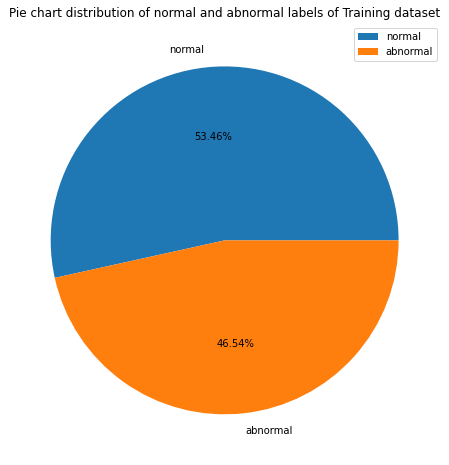

In [18]:
train_data_binary, le1 = binary_classification(train_data.copy())

# pie chart distribution of normal and abnormal labels of Training dataset
plt.figure(figsize=(8,8))
plt.pie(train_data_binary.label.value_counts(),labels=train_data_binary.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels of Training dataset")
plt.legend()
plt.savefig('plots/Pie_chart_Train_binary.png')
plt.show()

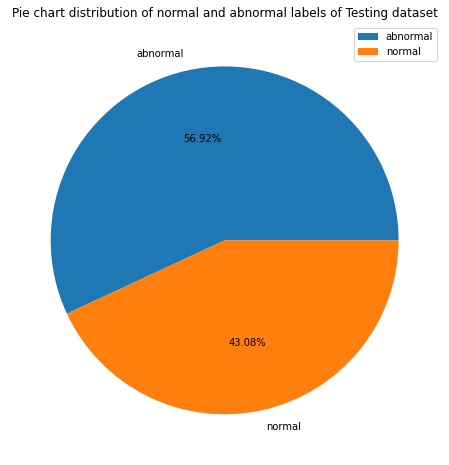

In [19]:
test_data_binary, le1 = binary_classification(test_data.copy())

# pie chart distribution of normal and abnormal labels of Testing dataset
plt.figure(figsize=(8,8))
plt.pie(test_data_binary.label.value_counts(),labels=test_data_binary.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels of Testing dataset")
plt.legend()
plt.savefig('plots/Pie_chart_Test_binary.png')
plt.show()

# **Multi-class Classification**

In [20]:
def multi_classification(df):
    # creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
    multi_data = df.copy()
    multi_label = pd.DataFrame(multi_data.label)

    # label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
    le2 = preprocessing.LabelEncoder()
    enc_label = multi_label.apply(le2.fit_transform)
    multi_data['intrusion'] = enc_label

    # one-hot-encoding attack label
    multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
    multi_data['label'] = multi_label

    return multi_data, le2

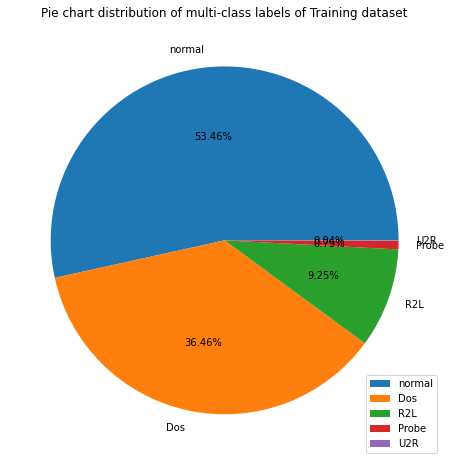

In [21]:
train_data_multi, le2 = multi_classification(train_data.copy())

# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(train_data_multi.label.value_counts(),labels=train_data_multi.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of multi-class labels of Training dataset")
plt.legend()
plt.savefig('plots/Pie_chart_Train_multi.png')
plt.show()

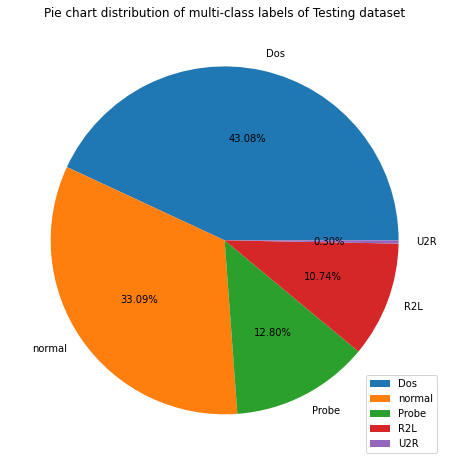

In [22]:
test_data_multi, le2 = multi_classification(test_data.copy())

# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(test_data_multi.label.value_counts(),labels=test_data_multi.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of multi-class labels of Testing dataset")
plt.legend()
plt.savefig('plots/Pie_chart_Test_multi.png')
plt.show()

# **Feature Extraction**

In [23]:
def binary_feature_ext(df, categorical, numeric_col):
    # creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
    numeric_bin = df[numeric_col]
    numeric_bin['intrusion'] = df['intrusion']

    # finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
    corr= numeric_bin.corr()
    corr_y = abs(corr['intrusion'])
    highest_corr = corr_y[corr_y >0.5]
    highest_corr.sort_values(ascending=True)

    # selecting attributes found by using pearson correlation coefficient
    numeric_bin = df[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate', 'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

    # joining the selected attribute with the one-hot-encoded categorical dataframe
    numeric_bin = numeric_bin.join(categorical)
    # then joining encoded, one-hot-encoded, and original attack label attribute
    df = numeric_bin.join(df[['intrusion','abnormal','normal','label']])

    return df

In [24]:
train_data_binary = binary_feature_ext(train_data_binary.copy(), train_categorical, train_numeric_col)

# saving final dataset to disk
train_data_binary.to_csv("./datasets/bin_data_train.csv")
# final dataset for binary classification
train_data_binary

/tmp/ipykernel_427/2800592247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = df['intrusion']


,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,abnormal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,abnormal


In [25]:
test_data_binary = binary_feature_ext(test_data_binary.copy(), train_categorical, test_numeric_col)

# saving final dataset to disk
test_data_binary.to_csv("./datasets/bin_data_test.csv")
# final dataset for binary classification
test_data_binary

/tmp/ipykernel_427/2800592247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = df['intrusion']


,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,1.166764,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,-1.305370,-1.169697,-1.697859,0,...,0,0,0,0,1,0,0,1,0,abnormal
1,0.443234,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,-1.397181,-1.250212,-1.770589,0,...,0,0,0,0,1,0,0,1,0,abnormal
2,-0.607053,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.002934,-0.489800,0.629488,0,...,1,0,0,0,0,0,1,0,1,normal
3,-0.607053,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.898090,-0.749234,0.629488,0,...,0,0,0,0,1,0,0,1,0,abnormal
4,-0.607053,0.054856,-0.348468,-0.358118,-0.35275,-0.890373,-0.685647,-0.489800,0.629488,0,...,0,0,0,0,1,0,0,1,0,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.607053,-0.347390,-0.348468,-0.321505,-0.35275,1.123125,0.255414,0.002232,0.629488,0,...,0,0,0,0,1,0,1,0,1,normal
22540,-0.599273,-0.347390,-0.348468,-0.321505,-0.35275,1.123125,0.898090,1.022079,0.629488,0,...,0,0,0,0,1,0,1,0,1,normal
22541,-0.575933,-0.347390,-0.348468,-0.358118,-0.35275,1.123125,0.898090,1.022079,0.629488,0,...,0,0,0,0,0,0,0,1,0,abnormal
22542,-0.583713,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.875137,0.995240,0.629488,0,...,0,0,0,0,1,0,1,0,1,normal


In [26]:
def multi_feature_ext(df, categorical, numeric_col):
    # creating a dataframe with only numeric attributes of multi class dataset and encoded label attribute 
    nummeric_df = df[numeric_col]
    nummeric_df['intrusion'] = df['intrusion']

    # finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
    corr= nummeric_df.corr()
    corr_y = abs(corr['intrusion'])
    highest_corr = corr_y[corr_y >0.5]
    highest_corr.sort_values(ascending=True)

    # selecting attributes found by using pearson correlation coefficient
    nummeric_df = df[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate', 'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

    # joining the selected attribute with the one-hot-encoded categorical dataframe
    nummeric_df = nummeric_df.join(categorical)
    # then joining encoded, one-hot-encoded, and original attack label attribute
    df = nummeric_df.join(df[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

    return df

In [27]:
train_data_multi = multi_feature_ext(train_data_multi.copy(), train_categorical, train_numeric_col)

# saving final dataset to disk
train_data_multi.to_csv("./datasets/multi_data_train.csv")
# final dataset for multi classification
train_data_multi

/tmp/ipykernel_427/2205900060.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nummeric_df['intrusion'] = df['intrusion']


,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,Dos


In [28]:
test_data_multi = multi_feature_ext(test_data_multi.copy(), train_categorical, test_numeric_col)

# saving final dataset to disk
test_data_multi.to_csv("./datasets/multi_data_test.csv")
# final dataset for multi classification
test_data_multi

/tmp/ipykernel_427/2205900060.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nummeric_df['intrusion'] = df['intrusion']


,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,1.166764,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,-1.305370,-1.169697,-1.697859,0,...,0,1,0,0,1,0,0,0,0,Dos
1,0.443234,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,-1.397181,-1.250212,-1.770589,0,...,0,1,0,0,1,0,0,0,0,Dos
2,-0.607053,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.002934,-0.489800,0.629488,0,...,0,0,0,4,0,0,0,0,1,normal
3,-0.607053,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.898090,-0.749234,0.629488,0,...,0,1,0,1,0,1,0,0,0,Probe
4,-0.607053,0.054856,-0.348468,-0.358118,-0.35275,-0.890373,-0.685647,-0.489800,0.629488,0,...,0,1,0,1,0,1,0,0,0,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.607053,-0.347390,-0.348468,-0.321505,-0.35275,1.123125,0.255414,0.002232,0.629488,0,...,0,1,0,4,0,0,0,0,1,normal
22540,-0.599273,-0.347390,-0.348468,-0.321505,-0.35275,1.123125,0.898090,1.022079,0.629488,0,...,0,1,0,4,0,0,0,0,1,normal
22541,-0.575933,-0.347390,-0.348468,-0.358118,-0.35275,1.123125,0.898090,1.022079,0.629488,0,...,0,0,0,0,1,0,0,0,0,Dos
22542,-0.583713,-0.347390,-0.348468,-0.358118,-0.35275,-0.890373,0.875137,0.995240,0.629488,0,...,0,1,0,4,0,0,0,0,1,normal


# **Linear Support Vector Machine Classifier (Binary Classification)**

In [29]:
X_train = train_data_binary.iloc[:,0:93].to_numpy()
y_train = train_data_binary['intrusion']

In [30]:
X_test = test_data_binary.iloc[:,0:93].to_numpy()
y_test = test_data_binary['intrusion']

In [31]:
ai_for_good = markov.Project.from_id(project_id="3m3mrYv9Yyn4qF")

✔ Fetching project with id 3m3mrYv9Yyn4qF Successfully fetched project


In [32]:
lsvm_binary_model = Model(
    name=f"Linear Support Vector Machine (lsvm) model for Binary Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

✔ Creating Model Model creation successful!


In [33]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [34]:
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

In [35]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  63.29843860894251


In [42]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Evaluatess Linear Support Vector Machine (LSVM) for Binary Classification",
    model_id=lsvm_binary_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

Upload Progress : 100%|██████████| 23/23 [00:01<00:00, 19.15batch/s]


In [43]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.68      0.68      0.68     12833
      normal       0.57      0.58      0.57      9711

    accuracy                           0.63     22544
   macro avg       0.63      0.63      0.63     22544
weighted avg       0.63      0.63      0.63     22544



In [44]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.36701561391057486
Mean Squared Error -  0.36701561391057486
Root Mean Squared Error -  0.6058181360033511
R2 Score -  -49.676287585048804
Accuracy -  63.29843860894251


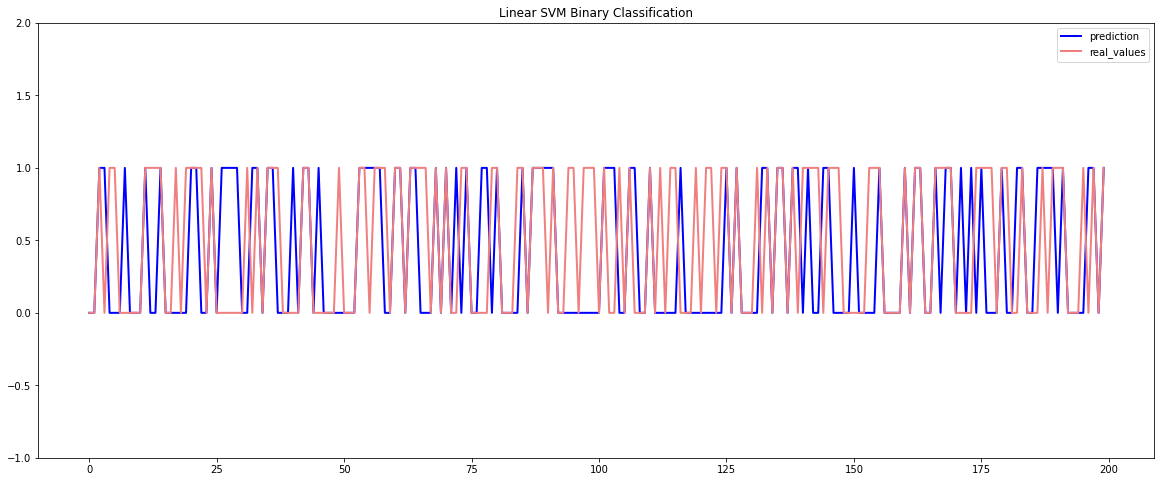

In [45]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear SVM Binary Classification")
plt.savefig('plots/lsvm_real_pred_bin.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Binary Classification)**

In [46]:
qsvm_binary_model = Model(
    name=f"Quadratic Support Vector Machine (qsvm) model for Binary Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

✔ Creating Model Model creation successful!


In [47]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [48]:
pkl_filename = "./models/qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [49]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  71.07434350603265


In [50]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Evaluating Quadratic Support Vector Machine (QSVM) for Binary Classification",
    model_id=qsvm_binary_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

Upload Progress : 100%|██████████| 23/23 [00:07<00:00,  2.99batch/s]


In [51]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.95      0.52      0.67     12833
      normal       0.60      0.97      0.74      9711

    accuracy                           0.71     22544
   macro avg       0.78      0.74      0.71     22544
weighted avg       0.80      0.71      0.70     22544



In [52]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.28925656493967355
Mean Squared Error -  0.28925656493967355
Root Mean Squared Error -  0.5378257756371235
R2 Score -  9.50563307964548
Accuracy -  71.07434350603265


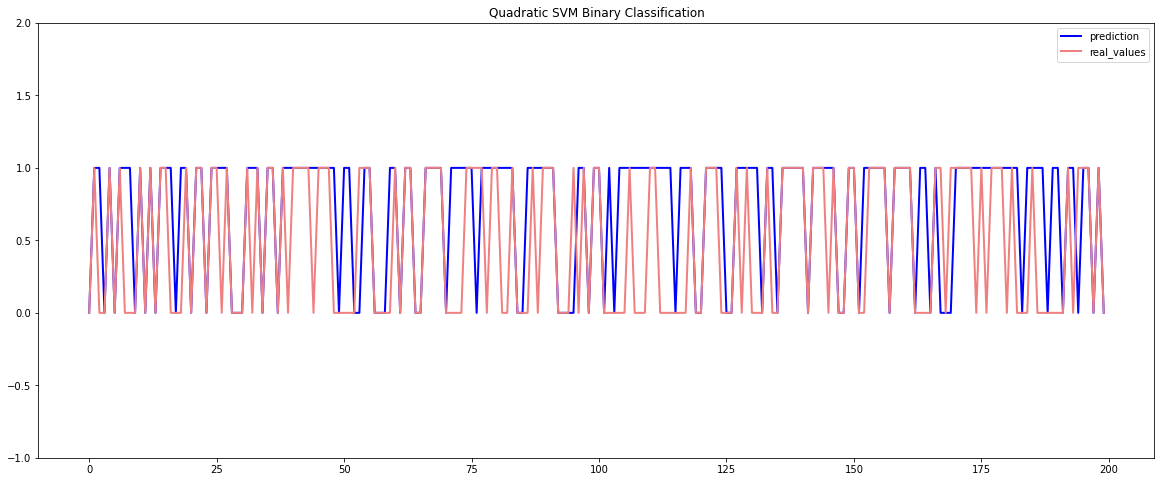

In [53]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.savefig('plots/qsvm_real_pred_bin.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [54]:
lda_binary_model = Model(
    name=f"Linear Discriminant Analysis Classifier (lda) model for Binary Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

✔ Creating Model Model creation successful!


In [55]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [56]:
pkl_filename = "./models/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

In [57]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  55.29630943931867


In [58]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Evaluating Linear Discriminant Analysis Classifier (lda) for Binary Classification",
    model_id=lda_binary_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

Upload Progress : 100%|██████████| 23/23 [00:01<00:00, 12.01batch/s]


In [59]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.63      0.52      0.57     12833
      normal       0.48      0.60      0.53      9711

    accuracy                           0.55     22544
   macro avg       0.56      0.56      0.55     22544
weighted avg       0.57      0.55      0.55     22544



In [60]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.44703690560681336
Mean Squared Error -  0.44703690560681336
Root Mean Squared Error -  0.6686081854171495
R2 Score -  -78.37777490667865
Accuracy -  55.29630943931867


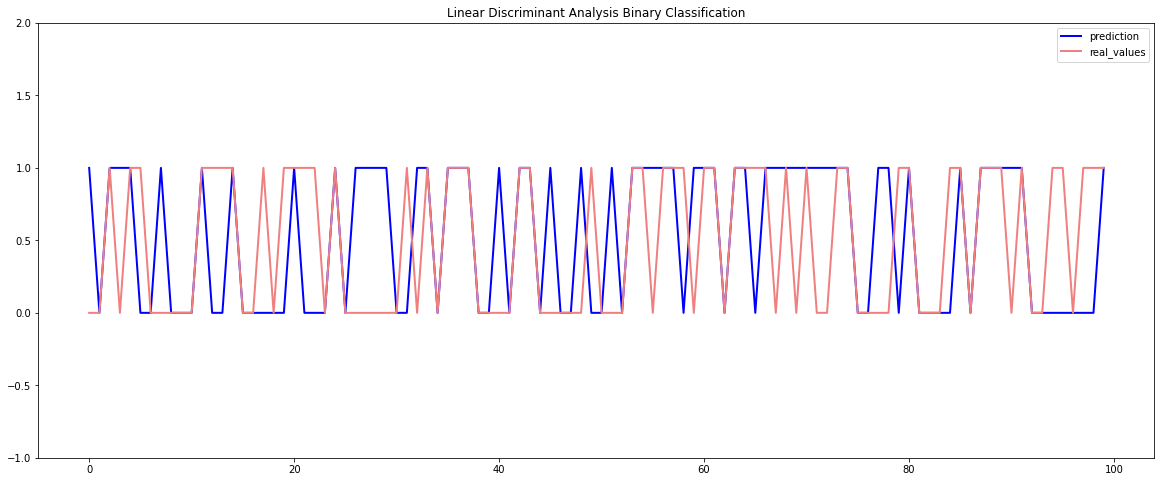

In [61]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear Discriminant Analysis Binary Classification")
plt.savefig('plots/lda_real_pred_bin.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [62]:
qda_binary_model = Model(
    name=f"Quadratic Discriminant Analysis Classifier (qda) model for Binary Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

✔ Creating Model Model creation successful!


In [63]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/opt/conda/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [64]:
pkl_filename = "./models/qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [65]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  44.94765791341377


In [66]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Evaluating Quadratic Discriminant Analysis Classifier (qda) for Binary Classification",
    model_id=qda_binary_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

Upload Progress : 100%|██████████| 23/23 [00:01<00:00, 14.31batch/s]


In [67]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.56      0.15      0.24     12833
      normal       0.43      0.84      0.57      9711

    accuracy                           0.45     22544
   macro avg       0.49      0.50      0.40     22544
weighted avg       0.50      0.45      0.38     22544



In [68]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.5505234208658624
Mean Squared Error -  0.5505234208658624
Root Mean Squared Error -  0.7419726550661165
R2 Score -  -54.7092770196046
Accuracy -  44.94765791341377


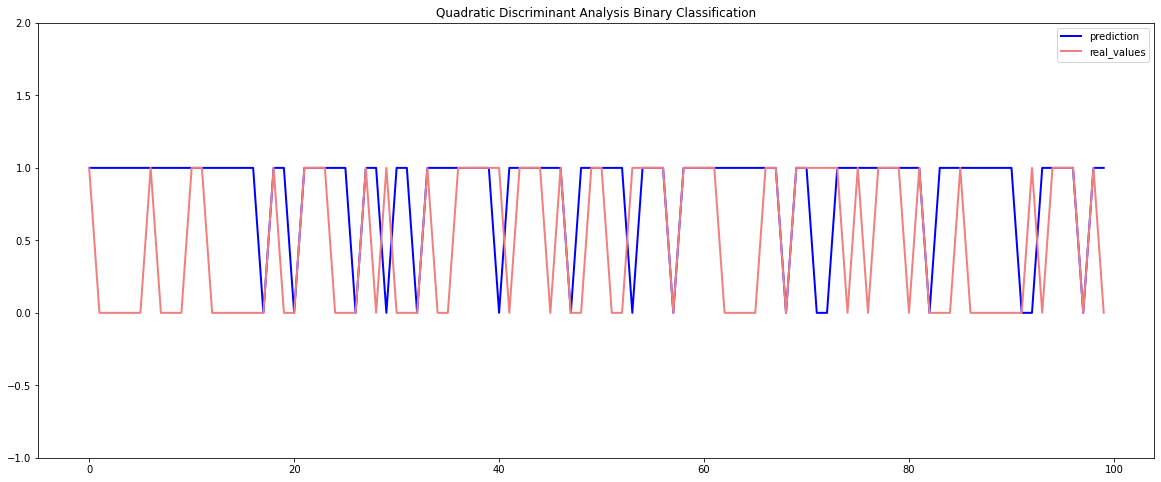

In [69]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic Discriminant Analysis Binary Classification")
plt.savefig('plots/qda_real_pred_bin.png')
plt.show()

# **Multi Layer Perceptron Classifier (Binary Classification)**

In [70]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [71]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# summary of model layers
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [73]:
markov.keras.auto_record(
    name=f"Multi Layer Perceptron Model (mlp) for Binary Classification",
    project_id=ai_for_good.project_id,
    model_class=markov.ModelClass.TAGGING
)

In [74]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

✔ Creating Model Model creation successful!
✔ Registering Hyper Parameter Recorder with Markov Backend. Recorder successfully registered.
ℹ You can view the experiment at \https://app.markovml.com/wsp-8vno69akba/proj/3m3mrYv9Yyn4qF/experiments/hp-AfZrjQgUWQYFBCBd2fJmDya]8;;\
ℹ Starting recorder to track training data on markov backend.
Epoch 1/100
21/21 [==============================] - 1s 19ms/step - loss: 0.5685 - accuracy: 0.7740 - val_loss: 0.4260 - val_accuracy: 0.8400
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 0.3532 - accuracy: 0.8871 - val_loss: 0.2859 - val_accuracy: 0.9124
Epoch 3/100
21/21 [==============================] - 0s 9ms/step - loss: 0.2516 - accuracy: 0.9190 - val_loss: 0.2187 - val_accuracy: 0.9218
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 0.2012 - accuracy: 0.9290 - val_loss: 0.1825 - val_accuracy: 0.9459
Epoch 5/100
21/21 [==============================] - 0s 9ms/step - loss: 0.1723 - accuracy: 0

In [75]:
filepath = './models/mlp_binary.json'
weightspath = './weights/mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [76]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
loss = test_results[0]
ac = test_results[1]*100
print(f'Test results - Loss: {loss} - Accuracy: {ac}')

705/705 [==============================] - 1s 1ms/step - loss: 1.0539 - accuracy: 0.7072
Test results - Loss: 1.0538519620895386 - Accuracy: 70.72391510009766


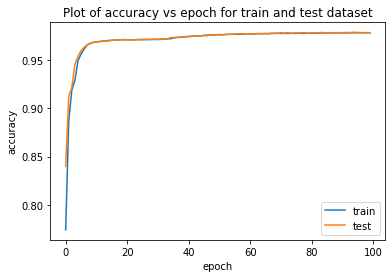

In [78]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

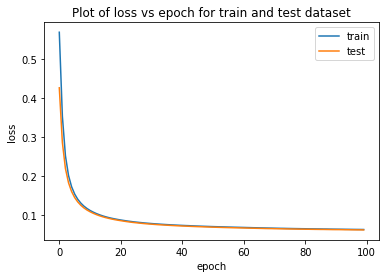

In [79]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_loss.png')
plt.show()

In [80]:
plot_model(mlp, to_file='plots/mlp_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [81]:
y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

705/705 [==============================] - 1s 1ms/step


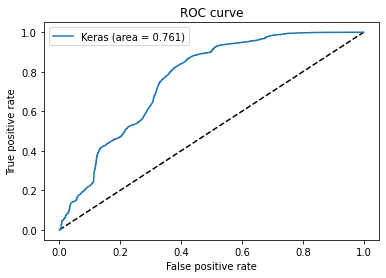

In [82]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('plots/mlp_binary_roc.png')
plt.show()

In [84]:
pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

705/705 [==============================] - 1s 1ms/step


In [85]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.8188652044073731
F1 Score -  0.7067188055456807
Precision Score -  0.6215899319940592


In [86]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Evaluating Multi Layer Perceptron Classifier (mlp) for Binary Classification",
    model_id=mlp.markov_model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_classes, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

Upload Progress : 100%|██████████| 23/23 [00:01<00:00, 15.27batch/s]


# **Auto Encoder Classifier (Binary Classification)**

In [87]:
X_train = train_data_binary
X_test = test_data_binary

In [88]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [89]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [90]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [94]:
# creating model with input, encoding, decoding, output layers
autoencoder = KerasModel(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [95]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_2 (Dense)             (None, 50)                4700      
                                                                 
 dense_3 (Dense)             (None, 93)                4743      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [96]:
markov.keras.auto_record(
    name=f"Auto Encoder Model for Binary Classification",
    project_id=ai_for_good.project_id,
    model_class=markov.ModelClass.TAGGING
)

In [97]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

✔ Creating Model Model creation successful!
✔ Registering Hyper Parameter Recorder with Markov Backend. Recorder successfully registered.
ℹ You can view the experiment at \https://app.markovml.com/wsp-8vno69akba/proj/3m3mrYv9Yyn4qF/experiments/hp-6kJ6vAqVTg3uTZyrUs29Vqg]8;;\
ℹ Starting recorder to track training data on markov backend.
Epoch 1/100
252/252 [==============================] - 2s 5ms/step - loss: 0.1115 - accuracy: 0.4034 - val_loss: 0.1076 - val_accuracy: 0.6015
Epoch 2/100
252/252 [==============================] - 1s 5ms/step - loss: 0.1051 - accuracy: 0.6624 - val_loss: 0.1067 - val_accuracy: 0.5377
Epoch 3/100
252/252 [==============================] - 1s 5ms/step - loss: 0.1048 - accuracy: 0.7243 - val_loss: 0.1064 - val_accuracy: 0.5234
Epoch 4/100
252/252 [==============================] - 1s 5ms/step - loss: 0.1047 - accuracy: 0.7556 - val_loss: 0.1064 - val_accuracy: 0.5182
Epoch 5/100
252/252 [==============================] - 1s 4ms/step - loss: 0.1046 - acc

In [98]:
filepath = './models/ae_binary.json'
weightspath = './weights/ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [99]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [100]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

705/705 [==============================] - 1s 1ms/step - loss: 0.1048 - accuracy: 0.5910
Test results - Loss: 0.10478212684392929 - Accuracy: 0.590977668762207%


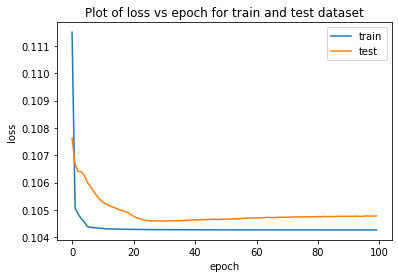

In [101]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_binary_loss.png')
plt.show()

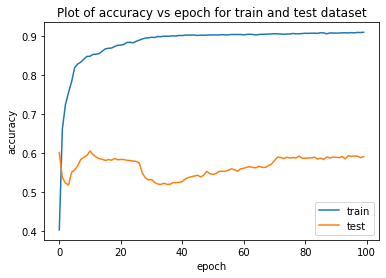

In [102]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

In [103]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [104]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

705/705 [==============================] - 1s 1ms/step


In [105]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [106]:
error_df.describe()

,reconstruction_error,true_class
count,22544.000000,22544.000000
mean,0.104782,0.430758
std,0.108474,0.495193
min,0.031597,0.000000
25%,0.056857,0.000000
50%,0.060255,0.000000
75%,0.100624,1.000000
max,0.508676,1.000000


In [107]:
predictions.shape

(22544, 93)

## **AE Classifier**

In [108]:
i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 50 neurons
fvector = Dense(50, activation="sigmoid")(i_layer)                    
#doutput layer
o_layer = Dense(1, activation='sigmoid')(fvector)

In [109]:
# creating model with input, encoding, decoding, output layers
ae_classifier = KerasModel(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
# summary of model layers
ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_4 (Dense)             (None, 50)                4700      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [126]:
markov.keras.auto_record(
    name=f"Auto Encoder Classifier Model (ae) for Binary Classification",
    project_id=ai_for_good.project_id,
    model_class=markov.ModelClass.TAGGING
)

In [127]:
# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

✔ Creating Model Model creation successful!
✔ Registering Hyper Parameter Recorder with Markov Backend. Recorder successfully registered.
ℹ You can view the experiment at \https://app.markovml.com/wsp-8vno69akba/proj/3m3mrYv9Yyn4qF/experiments/hp-4os5m4ELHHpi5akHuNarXpj]8;;\
ℹ Starting recorder to track training data on markov backend.
Epoch 1/300
37/37 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.7890 - val_loss: 0.4319 - val_accuracy: 0.7997
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.7878 - val_loss: 0.4315 - val_accuracy: 0.7986
Epoch 3/300
37/37 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.7892 - val_loss: 0.4314 - val_accuracy: 0.7988
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.7885 - val_loss: 0.4316 - val_accuracy: 0.7966
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.7

In [128]:
filepath = './models/ae_classifier_binary.json'
weightspath = './weights/ae_classifier_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  ae_classifier_json = ae_classifier.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(ae_classifier_json)

  # serialize weights to HDF5
  ae_classifier.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  ae_classifier = model_from_json(loaded_model_json)

  # load weights into new model
  ae_classifier.load_weights(weightspath)
  print("Loaded model from disk")

In [129]:
ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
loss = test_results[0]
ac = test_results[1]*100
print(f'Test results - Loss: {loss} - Accuracy: {ac}')

705/705 [==============================] - 1s 1ms/step - loss: 1.1651 - accuracy: 0.6368
Test results - Loss: 1.1651015281677246 - Accuracy: 63.67548108100891


In [135]:
# representation of model layers
plot_model(ae_classifier, to_file='plots/ae_classifier_binary.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


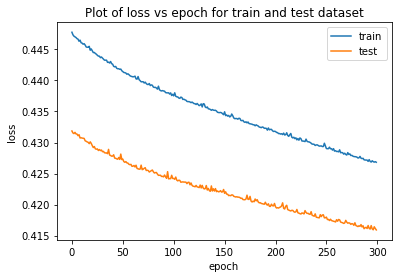

In [136]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_classifier_binary_loss.png')
plt.show()

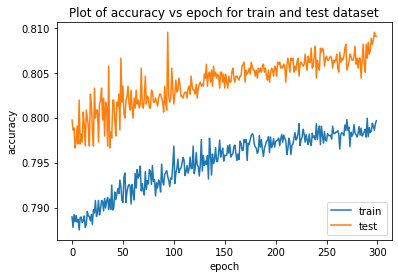

In [137]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_classifier_binary_accuracy.png')
plt.show()

In [138]:
y_pred = ae_classifier.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#auc = auc(fpr, tpr)

705/705 [==============================] - 1s 1ms/step


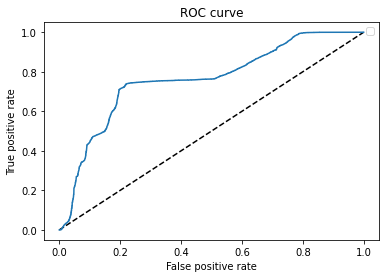

In [139]:
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('plots/ae_binary_roc.png')
plt.show()

In [140]:
pred = ae_classifier.predict(X_test)
y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

705/705 [==============================] - 1s 1ms/step


In [141]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Evaluating Auto Encoder Classifier (ae) for Binary Classification",
    model_id=ae_classifier.markov_model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_classes, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

TypeError: Inferred value should have the same type as actual. In the example inferred type  <class 'int'> is not <class 'numpy.int64'>

In [ ]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9760939549302492
F1 Score -  0.9110789605475489
Precision Score -  0.8541840567612687


# **Linear Support Vector Machine Classifier (Multi-class Classification)**

In [ ]:
X_train = train_data_multi.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
y_train = train_data_multi['intrusion'] # target attribute

In [ ]:
X_test = test_data_multi.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
y_test = test_data_multi['intrusion'] # target attribute

In [ ]:
lsvm_multi_model = Model(
    name=f"Linear Support Vector Machine Classifier (lsvm) model for Multi Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

In [ ]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [ ]:
# saving trained model to disk
pkl_filename = "./models/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loade model from disk


In [ ]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  95.24988886772083


In [ ]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Linear Support Vector Machine Classifier (lsvm) model for Multi Classification",
    model_id=lsvm_multi_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.82      2947
         R2L       0.61      0.60      0.61       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.10125738235854448
Mean Squared Error -  0.2831967993903601
Root Mean Squared Error -  0.5321623806606026
R2 Score -  92.1868366533396
Accuracy -  95.24988886772083


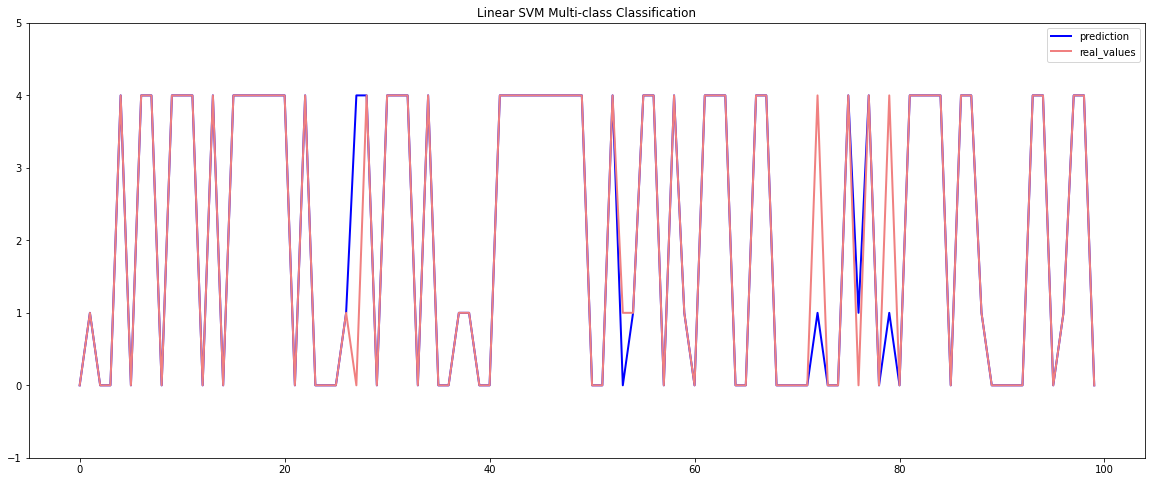

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear SVM Multi-class Classification")
plt.savefig('plots/lsvm_real_pred_multi.png')
plt.show()

# **Quadratic Support Vector Machine Classifier (Multi-class Classification)**

In [ ]:
qsvm_multi_model = Model(
    name=f"Quadratic Support Vector Machine Classifier (qsvm) model for Multi Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

In [ ]:
qsvm=SVC(kernel='poly',gamma='auto')
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [ ]:
pkl_filename = "./models/qsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred=qsvm.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Multi-class Set-Accuracy is ", ac)

QSVM-Classifier Multi-class Set-Accuracy is  92.86213246967677


In [ ]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Quadratic Support Vector Machine Classifier (qsvm) model for Multi Classification",
    model_id=qsvm_multi_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.1998158379373849
Mean Squared Error -  0.6449164920302279
Root Mean Squared Error -  0.8030669287364709
R2 Score -  82.88055324849559
Accuracy -  92.86213246967677


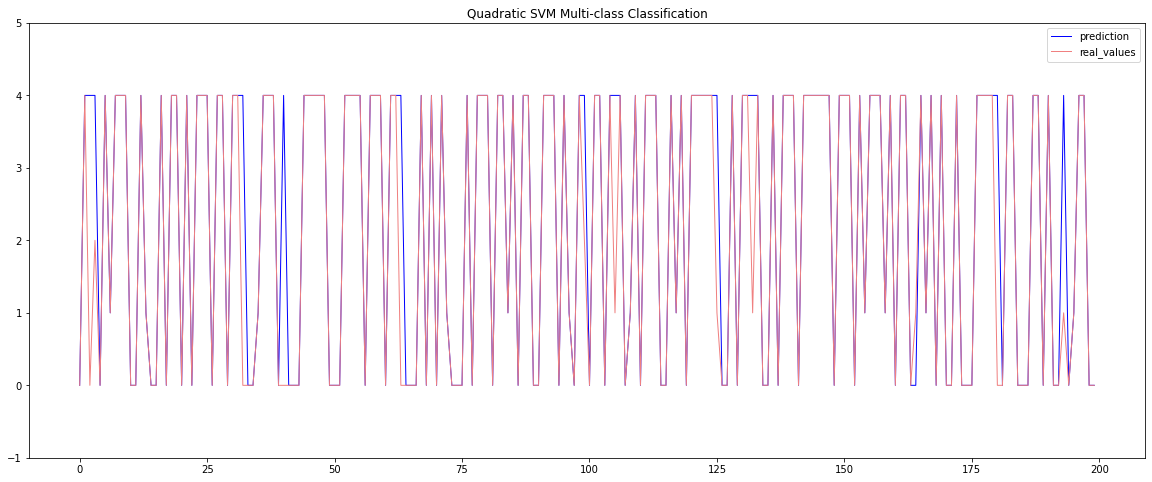

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=1.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=1.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic SVM Multi-class Classification")
plt.savefig('plots/qsvm_real_pred_multi.png')
plt.show()

# **Linear Discriminant Analysis Classifier (Multi-class Classification)**

In [ ]:
lda_multi_model = Model(
    name=f"Linear Discriminant Analysis Classifier (lda) model for Multi Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

LinearDiscriminantAnalysis()

In [ ]:
pkl_filename = "./models/lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  93.1923540991935


In [ ]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Linear Discriminant Analysis Classifier (lda) model for Multi Classification",
    model_id=lda_multi_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.94      0.96      0.95     11484
       Probe       0.88      0.73      0.80      2947
         R2L       0.37      0.89      0.52       274
         U2R       0.03      0.47      0.06        15
      normal       0.97      0.95      0.96     16774

    accuracy                           0.93     31494
   macro avg       0.64      0.80      0.66     31494
weighted avg       0.94      0.93      0.94     31494



In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.14380516923858513
Mean Squared Error -  0.3957261700641392
Root Mean Squared Error -  0.6290676991104687
R2 Score -  89.08369120793829
Accuracy -  93.1923540991935


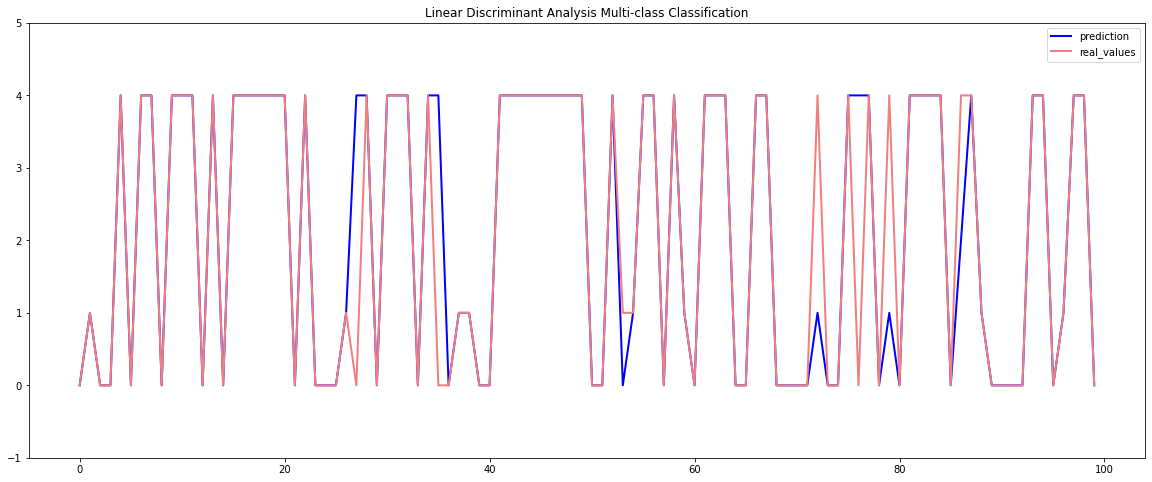

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Linear Discriminant Analysis Multi-class Classification")
plt.savefig('plots/lda_real_pred_multi.png')
plt.show()

# **Quadratic Discriminant Analysis Classifier (Multi-class Classification)**

In [ ]:
qda_multi_model = Model(
    name=f"Quadratic Discriminant Analysis Classifier (qda) model for Multi Classification",
    model_class=ModelClass.TAGGING,
    project_id=ai_for_good.project_id,
)

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/opt/conda/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
pkl_filename = "./models/qda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

QDA-Classifier Multi-class Set-Accuracy is  44.643424144281454


In [ ]:
# Now let us evaluate this model against (x_test, y_test)
evaluation_recorder = markov.EvaluationRecorder(
    name=f"Quadrtic Discriminant Analysis Classifier (qda) model for Multi Classification",
    model_id=qda_multi_model.model_id,
    project_id=ai_for_good.project_id,
)

evaluation_recorder.register()

urid = 1
for pred, actual in zip(y_pred, y_test):
    evaluation_record = SingleTagInferenceRecord(
        inferred=pred.argmax().item(),
        actual=actual,
        score=ac,
        urid=urid,
    )
    urid = urid + 1

    evaluation_recorder.add_record(evaluation_record)

outcome = evaluation_recorder.finish()

In [ ]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.41      0.58     11484
       Probe       0.97      0.06      0.11      2947
         R2L       0.03      1.00      0.06       274
         U2R       0.00      0.00      0.00        15
      normal       0.49      0.53      0.51     16774

    accuracy                           0.45     31494
   macro avg       0.50      0.40      0.25     31494
weighted avg       0.71      0.45      0.49     31494



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  1.599638026290722
Mean Squared Error -  5.107734806629834
Root Mean Squared Error -  2.2600298242788375
R2 Score -  -31.130397260237743
Accuracy -  44.643424144281454


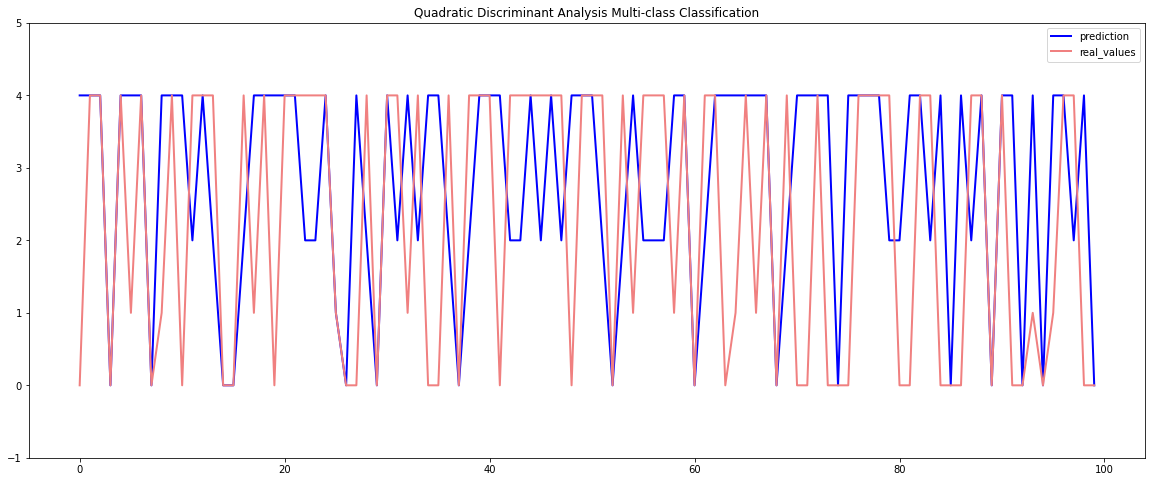

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,5))
plt.title("Quadratic Discriminant Analysis Multi-class Classification")
plt.savefig('plots/qda_real_pred_multi.png')
plt.show()

# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [ ]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                4700      
                                                                 
 dense_8 (Dense)             (None, 5)                 255       
                                                                 
Total params: 4,955
Trainable params: 4,955
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 24ms/step - loss: 1.5052 - accuracy: 0.3984 - val_loss: 1.2000 - val_accuracy: 0.4677
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 1.0158 - accuracy: 0.7047 - val_loss: 0.8128 - val_accuracy: 0.8748
Epoch 3/100
16/16 [==============================] - 0s 13ms/step - loss: 0.6907 - accuracy: 0.8963 - val_loss: 0.5642 - val_accuracy: 0.9070
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 0.4928 - accuracy: 0.9052 - val_loss: 0.4230 - val_accuracy: 0.9064
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 0.3839 - accuracy: 0.9066 - val_loss: 0.3473 - val_accuracy: 0.9146
Epoch 6/100
16/16 [==============================] - 0s 11ms/step - loss: 0.3247 - accuracy: 0.9158 - val_loss: 0.3054 - val_accuracy: 0.9213
Epoch 7/100
16/16 [==============================] - 0s 11ms/step - loss: 0.2895 - accuracy: 0.9225 - val_loss: 0.2776 - val_accuracy: 0.9287
Epoch 

In [ ]:
filepath = './models/mlp_multi.json'
weightspath = './weights/mlp_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")
  
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.0907 - accuracy: 0.9696
Test results - Loss: 0.09071186929941177 - Accuracy: 96.96450233459473%


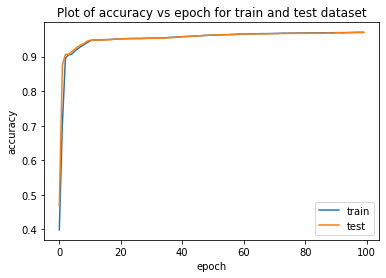

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

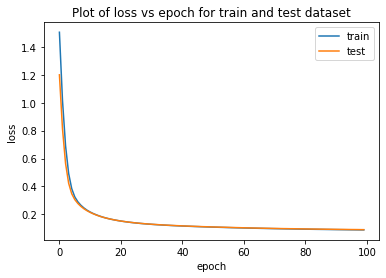

In [ ]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/mlp_multi_loss.png')
plt.show()

In [ ]:
# representation of model layers
plot_model(mlp, to_file='plots/mlp_multi.png', show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
n_classes = le2.classes_

5

In [ ]:
y_pred = mlp.predict(X_test)

985/985 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

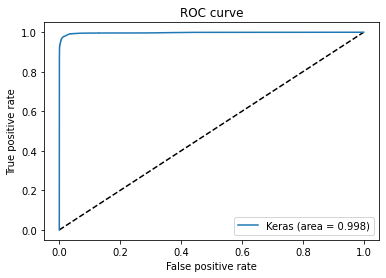

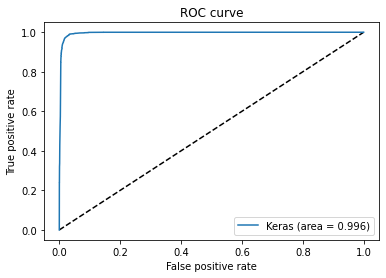

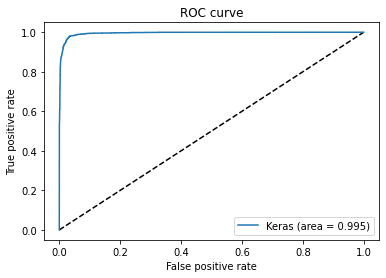

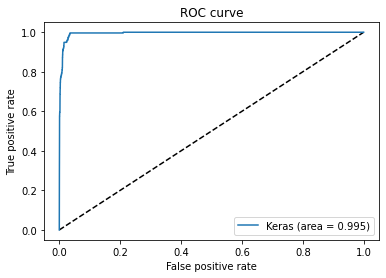

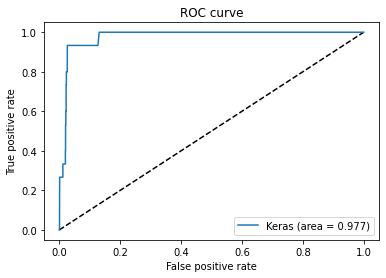

In [ ]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_mlp[i], tpr_mlp[i], label='Keras (area = {:.3f})'.format(roc_auc_mlp[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('plots/mlp_multi_roc'+str(i)+'.png')
  plt.show()

In [ ]:
pred = mlp.predict(X_test)

985/985 [==============================] - 1s 1ms/step


In [ ]:
for j in range(0,pred.shape[1]):
  for i in range(0,pred.shape[0]):
    pred[i][j] = int(round(pred[i][j]))

In [ ]:
pred_df = pd.DataFrame(pred,columns=y_test.columns)

In [ ]:
print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

Recall Score -  0.9676446307233124
F1 Score -  0.9697847221117282
Precision Score -  0.9719343007494817


# **Auto Encoder Classifier (Multi-class Classification)**

In [ ]:
X_train = train_data_binary
X_test = test_data_binary

In [ ]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
y_train = X_train[['Dos','normal','Probe','R2L','U2R']]

X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

#y_test = X_test['intrusion'] # target attribute
y_test = X_test[['Dos','normal','Probe','R2L','U2R']]

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# summary of model layers
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_9 (Dense)             (None, 50)                4700      
                                                                 
 dense_10 (Dense)            (None, 93)                4743      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 1s 6ms/step - loss: 0.1149 - accuracy: 0.2400 - val_loss: 0.1060 - val_accuracy: 0.3992
Epoch 2/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1051 - accuracy: 0.6889 - val_loss: 0.1050 - val_accuracy: 0.7560
Epoch 3/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1047 - accuracy: 0.7451 - val_loss: 0.1048 - val_accuracy: 0.7575
Epoch 4/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1045 - accuracy: 0.7628 - val_loss: 0.1047 - val_accuracy: 0.7290
Epoch 5/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1045 - accuracy: 0.7746 - val_loss: 0.1047 - val_accuracy: 0.8010
Epoch 6/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1044 - accuracy: 0.7891 - val_loss: 0.1046 - val_accuracy: 0.7968
Epoch 7/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1044 - accuracy: 0.8183 - val_loss: 0.1046 - val_accuracy: 0.8324

In [ ]:
filepath = './models/ae_multi.json'
weightspath = './weights/ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.1045 - accuracy: 0.8714
Test results - Loss: 0.10446740686893463 - Accuracy: 87.14040517807007%


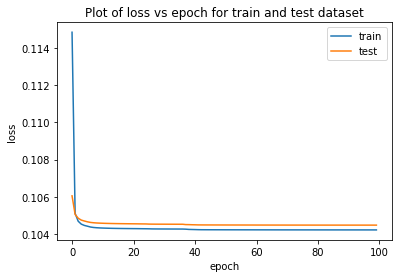

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_multi_loss.png')
plt.show()

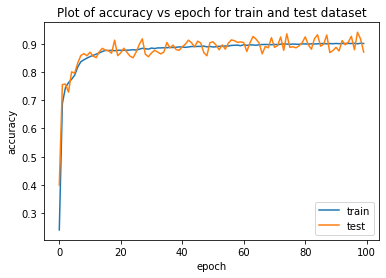

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_multi_accuracy.png')
plt.show()

In [ ]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_multi.png', show_shapes=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

985/985 [==============================] - 1s 1ms/step


## **AE Classifier**

In [ ]:
i_dim = predictions.shape[1]

#input layer
i_layer = Input(shape=(i_dim, ))
#hidden layer with 48 neurons
fvector = Dense(48, activation="sigmoid")(i_layer)   
#fvector = Dense(24, activation='tanh')(fvector)                 
#doutput layer
o_layer = Dense(5, activation='sigmoid')(fvector)

In [ ]:
# creating model with input, encoding, decoding, output layers
ae_classifier = Model(inputs=i_layer, outputs=o_layer)

# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
ae_classifier.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_11 (Dense)            (None, 48)                4512      
                                                                 
 dense_12 (Dense)            (None, 5)                 245       
                                                                 
Total params: 4,757
Trainable params: 4,757
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
his = ae_classifier.fit(predictions, y_test, epochs=200,batch_size=700, validation_split=0.2).history

Epoch 1/200
36/36 [==============================] - 1s 7ms/step - loss: 0.2060 - accuracy: 0.0956 - val_loss: 0.1672 - val_accuracy: 0.5321
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.1453 - accuracy: 0.5327 - val_loss: 0.1287 - val_accuracy: 0.5321
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.1206 - accuracy: 0.5327 - val_loss: 0.1139 - val_accuracy: 0.5321
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.5327 - val_loss: 0.1048 - val_accuracy: 0.5321
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.7084 - val_loss: 0.0966 - val_accuracy: 0.8217
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.8247 - val_loss: 0.0883 - val_accuracy: 0.8355
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.8352 - val_loss: 0.0800 - val_accuracy: 0.8390
Epoch 8/200
3

In [ ]:
filepath = './models/ae_classifier_multi.json'
weightspath = './weights/ae_classifier_multi.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  ae_classifier_json = ae_classifier.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(ae_classifier_json)

  # serialize weights to HDF5
  ae_classifier.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  ae_classifier = model_from_json(loaded_model_json)

  # load weights into new model
  ae_classifier.load_weights(weightspath)
  print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
ae_classifier.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.0570 - accuracy: 0.8914
Test results - Loss: 0.056964270770549774 - Accuracy: 89.14079070091248%


In [ ]:
# representation of model layers
plot_model(ae_classifier, to_file='plots/ae_classifier_multi.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


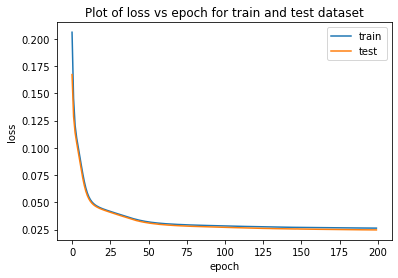

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_classifier_multi_loss.png')
plt.show()

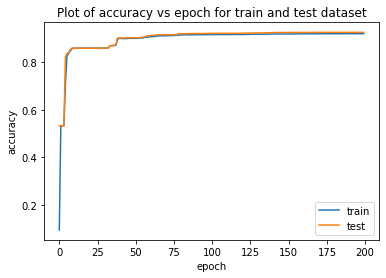

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_classifier_multi_accuracy.png')
plt.show()

In [ ]:
y_pred = ae_classifier.predict(X_test)

985/985 [==============================] - 1s 999us/step


In [ ]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])

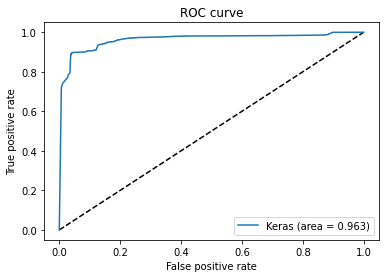

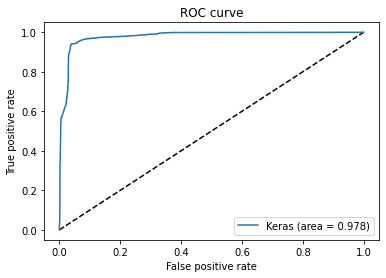

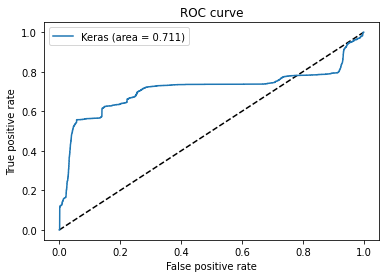

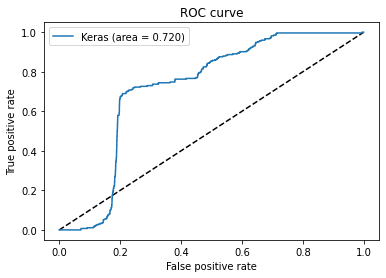

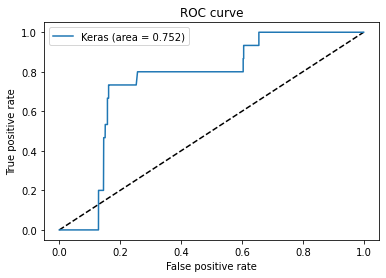

In [ ]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_ae[i], tpr_ae[i], label='Keras (area = {:.3f})'.format(roc_auc_ae[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('plots/ae_classifier_multi_roc'+str(i)+'.png')
  plt.show()

In [ ]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

In [ ]:
print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))

Recall Score -  0.9000444529116657
F1 Score -  0.8450393512997852
Precision Score -  0.7963701747485531
